In [16]:
# --- SQL Server Connection Test ---
import pyodbc
import pandas as pd

# STEP 1: Check available ODBC drivers
print("🧩 Available ODBC Drivers:")
for driver in pyodbc.drivers():
  print("   ", driver)

# STEP 2: Define connection details
server = "localhost\\SQL2022"             # Change if your instance name differs
database = "Chinook"                      # Change to your database
driver = "SQL Server"                     # Use one listed above
#driver = "ODBC Driver 18 for SQL Server"  # Use one listed above
trusted_connection = "yes"                # or "no" if using SQL auth
encrypt = "no"                            # disable encryption for local

conn_str = ( f"DRIVER={{{driver}}};"
             f"SERVER={server};"
             f"DATABASE={database};"
             f"Trusted_Connection={trusted_connection};"
             f"Encrypt={encrypt};" )

print("\n🔗 Connecting with:")
print(conn_str)

# STEP 3: Test connection and query
try:
  with pyodbc.connect(conn_str) as conn:
    query = "SELECT TOP 5 name, database_id FROM sys.databases;"
    df = pd.read_sql(query, conn)
    print("\n✅ Connection successful! Sample query output:")
    display(df)
except Exception as e:
  print("\n❌ Connection failed!")
  print(str(e))


🧩 Available ODBC Drivers:
    SQL Server
    ODBC Driver 17 for SQL Server
    Microsoft Access Driver (*.mdb, *.accdb)
    Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)
    Microsoft Access Text Driver (*.txt, *.csv)
    Microsoft Access dBASE Driver (*.dbf, *.ndx, *.mdx)
    ODBC Driver 18 for SQL Server

🔗 Connecting with:
DRIVER={SQL Server};SERVER=localhost\SQL2022;DATABASE=Chinook;Trusted_Connection=yes;Encrypt=no;

✅ Connection successful! Sample query output:


C:\Users\randel.bjorkquist\AppData\Local\Temp\ipykernel_74376\1208281810.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,name,database_id
0,master,1
1,tempdb,2
2,model,3
3,msdb,4
4,DWDiagnostics,5


In [ ]:
#import pyodbc
#import pandas as pd
#
#conn_str = ( "DRIVER={ODBC Driver 18 for SQL Server};"
#             "SERVER=localhost\\SQL2022;"
#             "DATABASE=Chinook;"
#             "Trusted_Connection=yes;"
#             "Encrypt=no;" )
#
#conn = pyodbc.connect(conn_str)
#
#query = "SELECT TOP 10 * FROM dbo.Employee"
#df = pd.read_sql(query, conn)
#df.head()

#IMPORTANT WARNING:
#C:\Users\randel.bjorkquist\AppData\Local\Temp\ipykernel_74376\3504717152.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
# df = pd.read_sql(query, conn)

In [ ]:
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine("mssql+pyodbc://localhost\\SQL2022/Chinook?driver=ODBC+Driver+18+for+SQL+Server&trusted_connection=yes&Encrypt=no")

df = pd.read_sql( "SELECT TOP 10 * FROM dbo.Employee"
                 ,engine )
df.head()


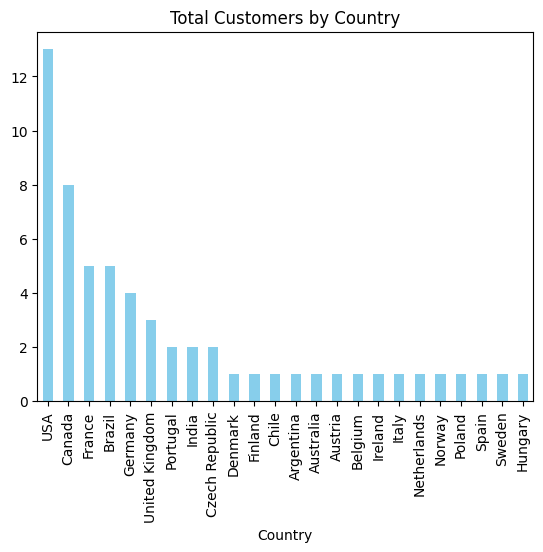

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#command = "SELECT C.Country AS 'Country', COUNT(*) AS 'TotalCustomers' FROM Customer AS C GROUP BY C.Country ORDER BY TotalCustomers DESC;"
command = """
SELECT C.Country  AS 'Country'
      ,COUNT(*)   AS 'Total Customers'
FROM dbo.Customer AS C
GROUP BY C.Country
ORDER BY [Total Customers] DESC;
"""

df = pd.read_sql(command, engine)
df.head()
df.plot.bar( x = 'Country'
            ,y = 'Total Customers'
            ,color = 'skyblue'
            ,legend = False )
plt.title('Total Customers by Country')
plt.show()